### 101 对称二叉树
给定一个二叉树，检查它是否是镜像对称的。

 

例如，二叉树 [1,2,2,3,4,4,3] 是对称的。

    1
   / \
  2   2
 / \ / \
3  4 4  3
 

但是下面这个 [1,2,2,null,3,null,3] 则不是镜像对称的:

    1
   / \
  2   2
   \   \
   3    3
 

进阶：

你可以运用递归和迭代两种方法解决这个问题吗？

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/symmetric-tree
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
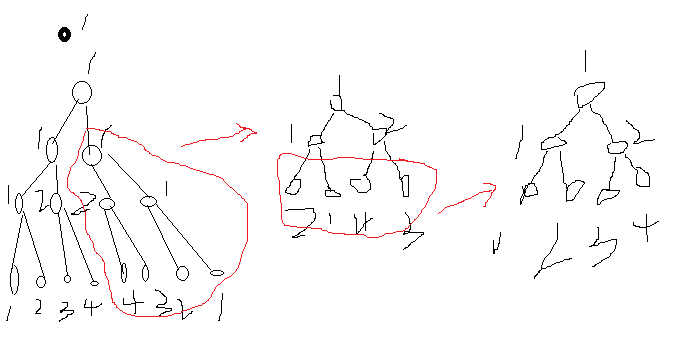

上图是一个对称树，我发现逐层交换右子树的左右节点后，得到新的右子树和左子树是同一棵树。那么我的想法是先交换右子树的每一层的左右节点，然后判断左子树和右子树是不是同一棵树。  


C++ 代码：

In [ ]:
class Solution {
public:
    bool isSymmetric(TreeNode* root) {
        if(root == NULL) return true;
        TreeNode* rc = root->right;
        swapTree(rc);
        return isSametree(root->left, root->right);
    }
    int swapTree(TreeNode* root){
        if(root == NULL) return 0;
        TreeNode* temp = root->left;
        root->left = root->right;
        root->right = temp;
        swapTree(root->left);
        swapTree(root->right);
        return 1;
    }
    bool isSametree(TreeNode *p, TreeNode *q){
        if(p == NULL && q == NULL) return true;
        else if(p == NULL || q == NULL) return false;
        else if(p->val != q->val) return false;
        else return isSametree(p->left, q->left) && isSametree(p->right, q->right);
    }
};

### 104 二叉树的最大深度
给定一个二叉树，找出其最大深度。

二叉树的深度为根节点到最远叶子节点的最长路径上的节点数。

说明: 叶子节点是指没有子节点的节点。

示例：
给定二叉树 [3,9,20,null,null,15,7]，

    3
   / \
  9  20
    /  \
   15   7
返回它的最大深度 3 。

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/maximum-depth-of-binary-tree
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
假设二叉树共有n个叶子节点，用$f(i)$表示根节点到第i个叶子节点的路径数，那么问题转为：
$max_{1<=i<=n}f(i)$

怎么得到$f(i)$呢？

使用深度优先搜索，每经过一个节点，那么路径数加1，直到走到叶子节点i，于是就得到$f(i)$.同时我们并不需要保存$f(i)$的值，只需要保存$f(i)$和之前的最大深度之间的最大值。  

C++ 代码：

In [ ]:
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
public:
    int maxDepth(TreeNode* root) {
        if(root == NULL) return 0;
        int len_path = 0;
        return searchTree(root, len_path);
    }
    int searchTree(TreeNode* root, int len_path){
        if(root->left == NULL && root->right == NULL) return len_path + 1;
        int left = 0, right = 0;
        if(root->left != NULL) left = searchTree(root->left, len_path + 1);
        if(root->right != NULL) right = searchTree(root->right, len_path + 1);
        return left > right ? left : right;

    }
};

### 94 二叉树的中序遍历
给定一个二叉树，返回它的中序 遍历。

示例:

输入: [1,null,2,3]
   1
    \
     2
    /
   3

输出: [1,3,2]
进阶: 递归算法很简单，你可以通过迭代算法完成吗？

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/binary-tree-inorder-traversal
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
递归：树的中序遍历先遍历节点的左孩子，再遍历节点，再遍历节点的右孩子。使用一个数组保存所有的节点值，按遍历顺序压入。
C++ 代码

In [ ]:
class Solution {
public:
    vector<int> inorderTraversal(TreeNode* root) {
        vector<int> res;
        
        return traversal(root, res);
    }
    vector<int> traversal(TreeNode* root, vector<int>& res){
        if(root == NULL) return res;
        res = traversal(root->left, res);
        res.push_back(root->val);
        res = traversal(root->right, res);
        return res;
    }
};

迭代：迭代使用一个辅助栈帮助进行，中序遍历先找到最左边的叶子节点，路径上的每个节点都压入栈中，遍历左节点后遍历左节点的父节点，再遍历父节点的右子节点。  
C++ 代码：

In [ ]:
class Solution {
public:
    vector<int> inorderTraversal(TreeNode* root) {
        vector<int> res;
        if(root == NULL) return res;
        stack<TreeNode*> helper;
        TreeNode* rt = root;
        while(rt != NULL || !helper.empty()){
            while(rt != NULL){
                helper.push(rt);
                rt = rt->left;
            }
            rt = helper.top();
            res.push_back(rt->val);
            helper.pop();
            rt = rt->right;
        }
        return res;
    }
};

### 95 不同的二叉搜索树 2
给定一个整数 n，生成所有由 1 ... n 为节点所组成的 二叉搜索树 。

 

示例：

输入：3
输出：
[
  [1,null,3,2],
  [3,2,null,1],
  [3,1,null,null,2],
  [2,1,3],
  [1,null,2,null,3]
]
解释：
以上的输出对应以下 5 种不同结构的二叉搜索树：

   1         3     3      2      1
    \       /     /      / \      \
     3     2     1      1   3      2
    /     /       \                 \
   2     1         2                 3
 

提示：

0 <= n <= 8

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/unique-binary-search-trees-ii
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

### 思路
首先要知道二叉搜索树是什么？  
⼆叉搜索树（Binary Search Tree， 简称 BST） 是⼀种很常⽤的的⼆叉树。 它的定义是： ⼀个⼆叉树中， 任意节点的值要⼤于等于左⼦树所有节点的值，且要⼩于等于右边⼦树的所有节点的值。

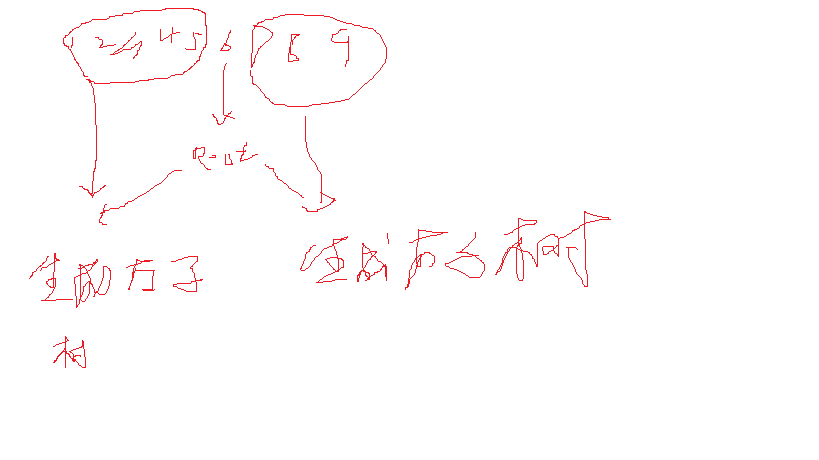

那么，我的想法是，外层循环选择所有可能的根节点，然后递归生成所有可能的左子树，递归生成所有可能的右子树，然后从左子树集合和右子树集合中选择一个组合拼接到根节点形成一颗二叉搜索树。

In [ ]:
class Solution{
public:
    vector<TreeNode*> generateTrees(int start, int end){
        if(start > end) return nullptr;
        vector<TreeNode*> allTrees;
        for (int i = start; i <= end; ++i){
            vector<TreeNode*> leftTrees = generateTrees(start, i-1);
            vector<TreeNode*> rightTrees = generateTrees(i + 1, end);
            for(auto& left: leftTrees){
                for(auto& right: rightTrees){
                    TreeNode* currTree = new TreeNode(i);
                    currTree->left = left;
                    currTree->right = right;
                    allTrees.emplace_back(currTree);
                }
            }
        }
        return allTrees;
    }
    vector<TreeNode*> generateTrees(int n){
        if(!n) return {};
        return generateTrees(1, n);
    }
};

### 96 不同的二叉搜索树1
给定一个整数 n，求以 1 ... n 为节点组成的二叉搜索树有多少种？

示例:

输入: 3
输出: 5
解释:
给定 n = 3, 一共有 5 种不同结构的二叉搜索树:

   1         3     3      2      1
    \       /     /      / \      \
     3     2     1      1   3      2
    /     /       \                 \
   2     1         2                 3

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/unique-binary-search-trees
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
用$f(i)$表示以$i$为根节点的二叉搜索树的个数，用$G(n)$表示总的个数，那么有：  
$G(n) = \sum^n_{i=1}f(i)$

当$i$为根节点时，左子树共有$G(i-1)$棵，右子树共有$G(n-i)$棵，以$i$为根节点的二叉搜索树共有$f(i)=G(i-1)G(n-i)$棵。

于是有$G(n) = \sum^n_{i=1}G(i-1)G(n-i),G(0) = 0, G(1) = 1$,从而写出递归代码，但是是超时的：

In [ ]:
class Solution {
public:
    int numTrees(int n) {
        if(n == 0) return 0;
        if(n == 1) return 1;
        int g_n = 0;
        for(int i = 1; i <= n; ++i){
            int g_left = numTrees(i - 1);
            int g_right = numTrees(n - i);
            int f_i = g_left * g_right == 0 ? (g_left == 0 ? g_right : g_left ) : g_left * g_right;
            g_n += f_i;
        }
        return g_n;
    }
};

进一步有：$$G(n) = G(0)G(n-1)+G(1)G(n-2)+...+G(n-1)G(0)$$

此处的乘积为笛卡尔积。因为$G(n)$依赖于$G(n-1)$所以我们从小到大求出就可以了。

In [ ]:
class Solution {
public:
    int numTrees(int n) {
        if(n == 0) return 0;
        if(n == 1) return 1;
        vector<int> G(n + 1, 0);
        G[0] = 1;  // 笛卡尔积令其为1
        G[1] = 1;
        for(int i = 2; i <= n; ++i)
            for(int j = 1; j < i + 1; ++j)
                G[i] += G[j - 1] * G[i - j];
        return G[n];
    }
};